In [99]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from bayesian_sde_solver.utils import insert


solver_name = "EKF0_2"
problem_name = "FHN_calibrated"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

N = 25
delta = 1 / N
fineN = int(N ** 1.0)
T = 1
Ndeltas = T / delta
no_samples = 2

euler_parabola_ode_sols=jnp.load(f'{folder}/{prefix}_pathwise_sols4_parabola_ode_{N}_{fineN}.npy')
fine_em = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fineN}.npy')
low_res_em = jnp.load(f'{folder}/{prefix}_pathwise_sols3_{N}_{fineN}.npy')
mean = jnp.load(f'{folder}/{prefix}_mean_pn_{N}_1.npy')
var = jnp.load(f'{folder}/{prefix}_var_pn_{N}_1.npy')

In [60]:
var

Array([[[ 9.20689572e-03,  1.02360152e-01, -1.02912344e-03,
          1.48395086e-02],
        [ 1.02360152e-01,  1.51833391e+00, -4.94732745e-02,
          2.03013822e-01],
        [-1.02912344e-03, -4.94732745e-02,  3.91820399e-03,
         -5.46188047e-03],
        [ 1.48395086e-02,  2.03013822e-01, -5.46188047e-03,
          2.77211964e-02]],

       [[ 4.17787284e-02,  4.22729403e-01, -2.64925486e-03,
          6.53173253e-02],
        [ 4.22729403e-01,  4.94458294e+00, -9.35342610e-02,
          7.27628171e-01],
        [-2.64925486e-03, -9.35342610e-02,  6.84082694e-03,
         -1.08147096e-02],
        [ 6.53173253e-02,  7.27628171e-01, -1.08147096e-02,
          1.08790666e-01]],

       [[ 1.30753130e-01,  1.07460141e+00,  4.42841148e-04,
          1.95686772e-01],
        [ 1.07460141e+00,  9.76877117e+00, -9.00708362e-02,
          1.70197248e+00],
        [ 4.42841148e-04, -9.00708362e-02,  9.37253237e-03,
         -8.70828424e-03],
        [ 1.95686772e-01,  1.70197248e+

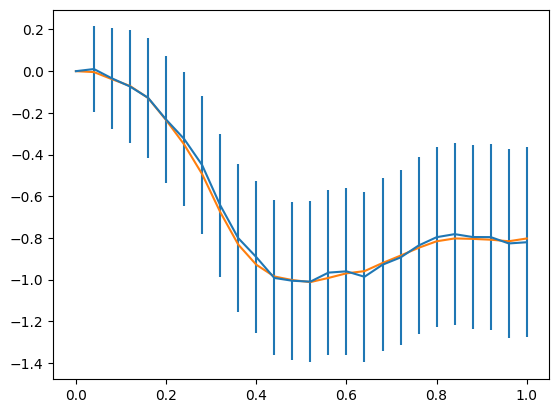

In [102]:
t = np.linspace(0,T, N+1)
# Select the coordinate, initialisation to (0, 0)
idx = 0
x_mean = insert(mean[:,idx*2], 0, 0., axis=0)
x_std = insert(np.sqrt(var[:,idx*2,idx*2]), 0, 0, 0)**0.5
plt.errorbar(x=t, y=x_mean, yerr=x_std)
fine = fine_em[::N][:,idx]

plt.plot(t, fine)
np.savetxt(f'{prefix}_UC_{idx}_{N}_{fineN}.csv', np.array([t, x_mean, x_std]).T, delimiter=',', header='t,mean,error', comments="")
np.savetxt(f'{prefix}_fine_{idx}_{N}_{fineN}.csv', np.array([t, fine]).T, delimiter=',', header='t,mean', comments="")

In [103]:
x_std

Array([0.        , 0.20419881, 0.2428347 , 0.26874074, 0.28878072,
       0.30534843, 0.3195884 , 0.332145  , 0.3434201 , 0.35368255,
       0.36312237, 0.3718786 , 0.38005665, 0.3877385 , 0.39498907,
       0.40186104, 0.4083975 , 0.4146344 , 0.4206019 , 0.4263257 ,
       0.43182778, 0.4371273 , 0.44224077, 0.44718277, 0.4519662 ,
       0.45660236], dtype=float32)

In [68]:
fine_em[1:][::20][:,0]

Array([0.        , 0.19945133, 0.256763  , 0.30959582, 0.36328647,
       0.41841513, 0.47287127, 0.5223503 , 0.5556355 , 0.56173813,
       0.5296579 , 0.4655714 , 0.39366007, 0.32331917, 0.273679  ,
       0.24877873, 0.24236478, 0.243749  , 0.24609932, 0.24702007,
       0.24720842, 0.24691135, 0.2475651 , 0.24854922, 0.2505748 ,
       0.25329423, 0.25520134, 0.25547075, 0.255506  , 0.25587237,
       0.25674388, 0.25683826, 0.25763065, 0.2601026 , 0.26262957,
       0.26369625, 0.2608365 , 0.25914595, 0.25850788, 0.25757995,
       0.25602597], dtype=float32)

In [13]:
fine_em.shape

(401, 2)

In [10]:
fine_em[1:.shape

(401, 2)